# HEATMAPS

In [1]:
import pandas as pd
import numpy as np
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
import pickle
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
# sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap"))
from PyComplexHeatmap import *
import seaborn as sns

## load files

In [4]:
df_meta = pd.read_csv('/media/user/Seagate_RNA/PCNSL_PSL/metadata_106.csv', sep=',')
df_meta.rename(columns={'IK':'KPS'},inplace=True)
#df_meta.head()

In [3]:
df_coef_str = pd.read_csv('/media/user/Seagate_RNA/PCNSL_PSL/coef_15_PCNSL_PLS.csv', sep=';')
df_coef_str.set_index('Unnamed: 0', inplace=True)
df_coef_str.head()

,Comp_1,Comp_2,Comp_3,Comp_4,Comp_5,Comp_6,Comp_7,Comp_8,Comp_9,Comp_10,Comp_11,Comp_12,Comp_13,Comp_14,Comp_15
Unnamed: 0,,,,,,,,,,,,,,,
original_shape2D_Elongation_zscore,"0,150593614275445","0,226737506409886","0,0272027336399564","-0,0280161571248265","0,168480399860162","-0,137347604771425","-0,198880794710268","-0,440062623367007","-0,251066105993158","-0,283580613305418","0,239537272924805","0,212474548036712","0,357849084718295","0,265913979378578","0,294275567989522"
original_shape2D_MajorAxisLength_zscore,"-0,0322715789448075","-0,111198230360929","0,44252777862477","0,0510145015668588","-0,330860901937312","-0,229635300044295","0,448109870815455","-0,154593635096425","-0,147586116254326","-0,157939701742902","-0,398327623090651","-0,0679657272822265","0,46033474321176","-0,818013723503997","-0,519711158017823"
original_shape2D_MaximumDiameter_zscore,"0,00328352378457517","-0,0921484042723343","0,42674576181615","0,0390477278609813","-0,238053192050593","-0,144456480059766","0,432014594411225","-0,140784994562466","-0,0120135302287116","-0,0362183990028453","-0,232940094620725","0,0164687995662526","0,833006008783729","-0,175447481477669","-0,346150531175946"
original_shape2D_MeshSurface_zscore,"-0,137664487392864","-0,0586768748572154","0,305687506881309","0,103647323880815","-0,0681355332339404","-0,118889103405624","0,405941347072656","-0,444545215079404","-0,169049235789761","-0,0697422997643047","0,779242077723151","-1,05028094826081","1,61731146848268","-0,0109576634098159","-1,09429590540426"
original_shape2D_MinorAxisLength_zscore,"-0,13626193852926","0,0297784410180866","0,257642752005506","0,123247748107054","0,0700306062805824","-0,112337425664666","0,235742168443461","-0,169573616256504","-0,0142315513702547","-0,119962393854515","0,506223578639821","-0,738324842781587","0,0688843466630026","0,199275781638717","0,270373775561387"


In [5]:
df_coef = df_coef_str
def type_(x):
    for i in list(df_coef.columns) :
        df_coef.at[x.name, i] = np.float64(df_coef.at[x.name, i].replace(',', '.'))
df_coef.apply(type_, axis=1)
df_coef.reset_index(inplace=True)
df_coef.head()

,Unnamed: 0,Comp_1,Comp_2,Comp_3,Comp_4,Comp_5,Comp_6,Comp_7,Comp_8,Comp_9,Comp_10,Comp_11,Comp_12,Comp_13,Comp_14,Comp_15
0,original_shape2D_Elongation_zscore,0.150594,0.226738,0.027203,-0.028016,0.16848,-0.137348,-0.198881,-0.440063,-0.251066,-0.283581,0.239537,0.212475,0.357849,0.265914,0.294276
1,original_shape2D_MajorAxisLength_zscore,-0.032272,-0.111198,0.442528,0.051015,-0.330861,-0.229635,0.44811,-0.154594,-0.147586,-0.15794,-0.398328,-0.067966,0.460335,-0.818014,-0.519711
2,original_shape2D_MaximumDiameter_zscore,0.003284,-0.092148,0.426746,0.039048,-0.238053,-0.144456,0.432015,-0.140785,-0.012014,-0.036218,-0.23294,0.016469,0.833006,-0.175447,-0.346151
3,original_shape2D_MeshSurface_zscore,-0.137664,-0.058677,0.305688,0.103647,-0.068136,-0.118889,0.405941,-0.444545,-0.169049,-0.069742,0.779242,-1.050281,1.617311,-0.010958,-1.094296
4,original_shape2D_MinorAxisLength_zscore,-0.136262,0.029778,0.257643,0.123248,0.070031,-0.112337,0.235742,-0.169574,-0.014232,-0.119962,0.506224,-0.738325,0.068884,0.199276,0.270374


In [6]:
df_coordonnees_str = pd.read_csv('/media/user/Seagate_RNA/PCNSL_PSL/coordonnées_106_PCNSL_PLS.csv', sep=';')
df_coordonnees_str.drop(columns='Unnamed: 0', inplace=True)
df_coordonnees_str.head()


,Comp_1,Comp_2,Comp_3,Comp_4,Comp_5,Comp_6,Comp_7,Comp_8,Comp_9,Comp_10,Comp_11,Comp_12,Comp_13,Comp_14,Comp_15
0,"-2,82000147249316","-2,82416917718319","6,49274237730698","-2,50699826280587","-2,17148194837327","2,37805843056755","-7,88413795102879","2,84691581031404","0,500141168156663","-7,14735710318993","4,00729625854438","5,59202962060803","0,36285160103402","1,07911871856666","-1,86393059402237"
1,"-0,34513976919193","2,3343256839279","1,04054720928463","-7,29691645157191","-1,01819204643649","-2,60307837483823","-1,23485985149997","1,66832784569842","0,66843400434025","-1,1592681696949","-0,0420293842961125","4,10619801223837","0,676906461064371","0,193923553615318","-0,406583445080273"
2,"-9,61933618017517","2,26426135229669","-3,59651083054201","-10,3240744529951","2,43350836742729","1,43746709163704","8,21867726526431","2,85544666899571","0,862801131328142","-4,21718045634245","0,414669185441289","3,91077480044965","2,56714764133194","1,57542831913124","-1,38005789491977"
3,"-6,81042440348072","3,76983756875701","2,07414866875081","-6,35924379333566","3,76420233158684","2,21121462407275","4,64345081389515","0,695595294628656","0,309159971394086","-4,40141983054222","1,79024069941377","1,21857857342444","2,65177526230035","0,27859841292193","-3,10587489680664"
4,"-3,41759659762936","-15,0863412141295","4,8886024917199","0,090810427395173","-0,18320607864131","-2,68830887635994","-1,94422126408485","4,5075523009317","-0,787085495777359","0,708222784248477","0,256007366870124","-0,250322541425112","-2,5938641142379","-0,159250548558079","0,173814995483039"


In [7]:
df_coordonnees = df_coordonnees_str
def type_(x):
    for i in list(df_coordonnees.columns) :
        df_coordonnees.at[x.name, i] = float(df_coordonnees.at[x.name, i].replace(',', '.'))
df_coordonnees.apply(type_, axis=1)

0      None
1      None
2      None
3      None
4      None
       ... 
101    None
102    None
103    None
104    None
105    None
Length: 106, dtype: object

In [8]:
df_coordonnees.reset_index(inplace=True)
df_meta.reset_index(inplace=True)

## Without variables radiomics

In [13]:
df = pd.merge(df_meta, df_coordonnees, on='index', how='left')
df['Gender'] = np.where(df['Sex']=='F', 0, 1)

In [14]:
clinical = ['Overall.Survival.Months', 'KPS', 'Age']#'Gender']
# Age=['Age'] 
# IK = ['IK']
cells = ['B.cells.naive', 'B.cells.memory', 'Plasma.cells', 'T.cells.CD8',
       'T.cells.CD4.naive', 'T.cells.CD4.memory.resting',
       'T.cells.CD4.memory.activated', 'T.cells.follicular.helper',
       'T.cells.regulatory..Tregs.', 'T.cells.gamma.delta', 'NK.cells.resting',
       'NK.cells.activated', 'Monocytes', 'Macrophages.M0', 'Macrophages.M1',
       'Macrophages.M2', 'Dendritic.cells.resting',
       'Dendritic.cells.activated', 'Mast.cells.resting',
       'Mast.cells.activated', 'Eosinophils', 'Neutrophils', 'RMSE',
       'CD3D_exp']

In [15]:
df_corr = df[['Age', 'B.cells.naive', 'B.cells.memory',
       'Plasma.cells', 'T.cells.CD8', 'T.cells.CD4.naive',
       'T.cells.CD4.memory.resting', 'T.cells.CD4.memory.activated',
       'T.cells.follicular.helper', 'T.cells.regulatory..Tregs.',
       'T.cells.gamma.delta', 'NK.cells.resting', 'NK.cells.activated',
       'Monocytes', 'Macrophages.M0', 'Macrophages.M1', 'Macrophages.M2',
       'Dendritic.cells.resting', 'Dendritic.cells.activated',
       'Mast.cells.resting', 'Mast.cells.activated', 'Eosinophils','Neutrophils',
              'RMSE', 
              #'CD96_group',

              #'MSKCC', 
              'Overall.Survival.Months',
               'CD3D_exp', 'KPS', 'Gender','Cluster_consensus',
              'Comp_1', 'Comp_2', 'Comp_3', 'Comp_4', 'Comp_5', 'Comp_6', 'Comp_7',
       'Comp_8', 'Comp_9', 'Comp_10', 'Comp_11', 'Comp_12', 'Comp_13',
       'Comp_14', 'Comp_15']]

In [16]:
corr = df_corr.corr(numeric_only=False)
corr.drop(index=['Age', 'B.cells.naive', 'B.cells.memory',
       'Plasma.cells', 'T.cells.CD8', 'T.cells.CD4.naive',
       'T.cells.CD4.memory.resting', 'T.cells.CD4.memory.activated',
       'T.cells.follicular.helper', 'T.cells.regulatory..Tregs.',
       'T.cells.gamma.delta', 'NK.cells.resting', 'NK.cells.activated',
       'Monocytes', 'Macrophages.M0', 'Macrophages.M1', 'Macrophages.M2',
       'Dendritic.cells.resting', 'Dendritic.cells.activated',
       'Mast.cells.resting', 'Mast.cells.activated', 'Eosinophils','Neutrophils',
              'RMSE', 
              #'CD96_group',
              #'MSKCC', 
              'Overall.Survival.Months', 'KPS',#'Gender',
                 'Gender','Cluster_consensus',
                'CD3D_exp'], inplace=True)
corr.drop(columns=['Comp_1', 'Comp_2', 'Comp_3', 'Comp_4', 'Comp_5', 'Comp_6', 'Comp_7',
       'Comp_8', 'Comp_9', 'Comp_10', 'Comp_11', 'Comp_12', 'Comp_13',
       'Comp_14', 'Comp_15'], inplace=True)
corr.head()

,Age,B.cells.naive,B.cells.memory,Plasma.cells,T.cells.CD8,T.cells.CD4.naive,T.cells.CD4.memory.resting,T.cells.CD4.memory.activated,T.cells.follicular.helper,T.cells.regulatory..Tregs.,...,Mast.cells.resting,Mast.cells.activated,Eosinophils,Neutrophils,RMSE,Overall.Survival.Months,CD3D_exp,KPS,Gender,Cluster_consensus
Comp_1,0.257479,0.104546,0.130261,-0.241262,-0.135287,0.128499,-0.293305,0.207969,-0.057544,-0.149956,...,0.040237,-0.106137,-0.077238,-0.023867,-0.109472,-0.467602,-0.062924,-0.144283,0.025545,-0.080842
Comp_2,0.070549,-0.135990,-0.253966,0.036094,0.294384,-0.119834,0.103002,0.085136,0.197919,0.048553,...,0.039825,0.250623,-0.079131,-0.068915,0.303368,-0.235772,0.243601,-0.093915,0.014996,0.346800
Comp_3,0.210997,0.219208,0.076939,-0.079220,-0.198092,0.043824,-0.017726,-0.017027,-0.011424,-0.154167,...,-0.155001,-0.013514,-0.046526,-0.017766,-0.024299,-0.249296,-0.201018,-0.260970,0.232360,-0.190192
Comp_4,0.138941,0.167906,-0.204021,-0.051379,-0.035402,0.070931,-0.074439,0.297624,-0.083949,-0.118927,...,0.149511,-0.133045,0.080368,-0.120030,0.180700,-0.204307,0.073648,-0.231182,0.006189,0.059103
Comp_5,0.083463,0.049723,0.128783,-0.249231,-0.146422,0.167321,-0.073901,0.026977,-0.061022,-0.070065,...,-0.098509,0.067905,-0.125830,-0.066108,-0.114467,-0.198427,-0.041293,-0.085675,-0.014883,-0.154963


In [17]:
df_rows_h = corr.copy()
df_rows_h = df_rows_h.T
df_rows_h.drop(index=['Gender', 'Cluster_consensus', 'RMSE'], inplace=True)
df_rows_h['groupe'] = 's'

def groupe(x) :
    if x.name in clinical :
        df_rows_h.at[x.name, 'groupe'] = 'clinical'
    else :# x.name in cells :
        df_rows_h.at[x.name, 'groupe'] = 'cells'

df_rows_h.apply(groupe, axis=1)
        
df_rows_h#.set_index('groupe', inplace=True)

,Comp_1,Comp_2,Comp_3,Comp_4,Comp_5,Comp_6,Comp_7,Comp_8,Comp_9,Comp_10,Comp_11,Comp_12,Comp_13,Comp_14,Comp_15,groupe
Age,0.257479,0.070549,0.210997,0.138941,0.083463,0.139082,0.127195,-0.011790,0.152474,0.145346,0.003344,-0.049071,0.024136,0.183521,-0.019070,clinical
B.cells.naive,0.104546,-0.135990,0.219208,0.167906,0.049723,-0.261388,0.093517,0.059231,0.127336,-0.058877,-0.000779,-0.158142,0.145282,-0.010785,0.112679,cells
B.cells.memory,0.130261,-0.253966,0.076939,-0.204021,0.128783,-0.024206,0.001861,0.029864,-0.092422,-0.008303,-0.094895,0.016432,-0.235953,-0.006986,-0.005463,cells
Plasma.cells,-0.241262,0.036094,-0.079220,-0.051379,-0.249231,-0.111571,0.027536,-0.101774,-0.003441,0.100559,-0.043387,-0.184268,0.018095,-0.050647,-0.065398,cells
T.cells.CD8,-0.135287,0.294384,-0.198092,-0.035402,-0.146422,0.196943,-0.066566,-0.031378,0.009404,-0.027166,-0.011882,0.044189,0.001816,0.064130,0.004222,cells
T.cells.CD4.naive,0.128499,-0.119834,0.043824,0.070931,0.167321,-0.027157,0.073233,0.003794,-0.001907,0.078283,-0.132582,0.067553,0.005565,0.020510,0.089560,cells
T.cells.CD4.memory.resting,-0.293305,0.103002,-0.017726,-0.074439,-0.073901,0.031762,-0.058549,0.050827,0.042525,0.033344,0.020271,0.010278,0.077288,-0.080223,-0.099898,cells
T.cells.CD4.memory.activated,0.207969,0.085136,-0.017027,0.297624,0.026977,0.086164,-0.028427,-0.092245,0.031447,-0.015358,0.083437,0.112691,-0.043641,0.062456,0.024059,cells
T.cells.follicular.helper,-0.057544,0.197919,-0.011424,-0.083949,-0.061022,0.210484,-0.131137,0.077345,-0.108267,-0.099458,0.199608,0.082721,0.131089,0.002422,-0.010865,cells
T.cells.regulatory..Tregs.,-0.149956,0.048553,-0.154167,-0.118927,-0.070065,0.106259,-0.142867,0.061505,0.050031,-0.178152,0.234002,-0.001164,-0.068019,-0.146122,-0.087143,cells


In [18]:
df_rows_groupe = df_rows_h[['groupe']]
df_rows_groupe

,groupe
Age,clinical
B.cells.naive,cells
B.cells.memory,cells
Plasma.cells,cells
T.cells.CD8,cells
T.cells.CD4.naive,cells
T.cells.CD4.memory.resting,cells
T.cells.CD4.memory.activated,cells
T.cells.follicular.helper,cells
T.cells.regulatory..Tregs.,cells


In [19]:
comp = ['Comp_1','Comp_2','Comp_3','Comp_4','Comp_5','Comp_6','Comp_7','Comp_8',
       'Comp_9','Comp_10','Comp_11','Comp_12','Comp_13','Comp_14','Comp_15']

In [20]:
df_rows_h.sort_values(by=comp, axis=0)

,Comp_1,Comp_2,Comp_3,Comp_4,Comp_5,Comp_6,Comp_7,Comp_8,Comp_9,Comp_10,Comp_11,Comp_12,Comp_13,Comp_14,Comp_15,groupe
Overall.Survival.Months,-0.467602,-0.235772,-0.249296,-0.204307,-0.198427,-0.161344,-0.272425,-0.153930,-0.114753,-0.194514,-0.035352,-0.023594,-0.229102,-0.026480,-0.052981,clinical
NK.cells.activated,-0.346150,0.074623,-0.086792,-0.093503,0.020363,0.134537,-0.133730,0.094479,-0.056028,-0.083574,-0.098043,-0.060745,0.053301,0.136269,-0.076064,cells
T.cells.CD4.memory.resting,-0.293305,0.103002,-0.017726,-0.074439,-0.073901,0.031762,-0.058549,0.050827,0.042525,0.033344,0.020271,0.010278,0.077288,-0.080223,-0.099898,cells
Plasma.cells,-0.241262,0.036094,-0.079220,-0.051379,-0.249231,-0.111571,0.027536,-0.101774,-0.003441,0.100559,-0.043387,-0.184268,0.018095,-0.050647,-0.065398,cells
T.cells.gamma.delta,-0.213491,0.039596,-0.064868,-0.216828,0.090172,0.085962,0.178843,0.120696,0.034786,-0.126751,0.005911,0.136325,0.148041,0.109714,-0.149727,cells
Dendritic.cells.resting,-0.168025,-0.032719,0.082296,-0.016937,-0.198708,0.047975,-0.249713,0.056176,0.019286,-0.295073,0.151015,0.113963,0.079959,0.097531,-0.167474,cells
T.cells.regulatory..Tregs.,-0.149956,0.048553,-0.154167,-0.118927,-0.070065,0.106259,-0.142867,0.061505,0.050031,-0.178152,0.234002,-0.001164,-0.068019,-0.146122,-0.087143,cells
KPS,-0.144283,-0.093915,-0.260970,-0.231182,-0.085675,-0.089457,-0.081144,-0.021238,-0.036279,-0.160396,0.013326,0.056300,-0.055793,-0.177855,0.002158,clinical
T.cells.CD8,-0.135287,0.294384,-0.198092,-0.035402,-0.146422,0.196943,-0.066566,-0.031378,0.009404,-0.027166,-0.011882,0.044189,0.001816,0.064130,0.004222,cells
Macrophages.M1,-0.117483,0.239869,-0.135884,0.080968,0.045394,0.287328,-0.131984,-0.033739,-0.110785,0.014047,-0.022195,0.048114,0.045933,-0.046987,0.050765,cells


## Heatmap correlation between components and molecular data

Starting plotting HeatmapAnnotations


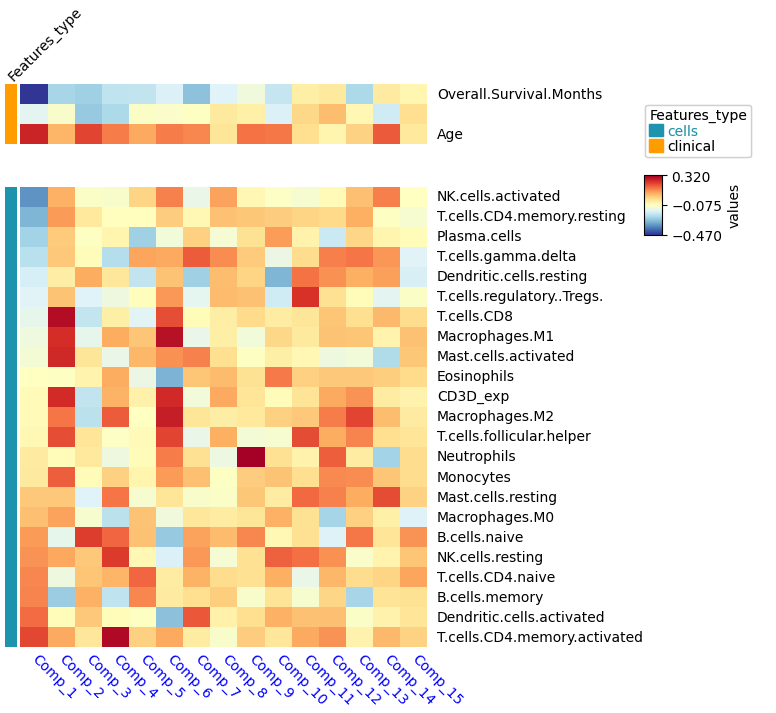

In [22]:
plt.figure(figsize=(5.5, 6.5))
df_rows_h = df_rows_h.sort_values(by=comp, axis=0)
#df_rows_h.drop(index=['RMSE'],inplace=True)
#df_rows_h.rename(columns={'IK':'KPS'}, inplace=True)

row_colors_dict={'groupe':{
                'cells':'#1E93AE','clinical':'#FF9C00'}}


row_ha = HeatmapAnnotation(Features_type=anno_simple(df_rows_groupe['groupe'],colors=row_colors_dict['groupe'],rasterized=False),
                           #,'horizontalalignment':'left'},
                           label=False,label_kws={'rotation':45,  'rotation_mode':'anchor',}, 
                           axis=0)

cm = ClusterMapPlotter(data=df_rows_h.drop(columns='groupe').sort_values(by=comp, axis=0),
                       left_annotation=row_ha,
                        col_cluster=False,row_cluster=False,
                       row_split=df_rows_h.sort_values(by=comp, axis=0).groupe, row_split_order = ['clinical','cells'],
                        col_split_gap=0.5,row_split_gap=10,
                        label='values',
                        show_rownames=True,
                       show_colnames=True,
                       row_names_side='right',
                        tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=5,
                        cmap='RdYlBu_r',xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'}
                      )

#plt.savefig("correlation_components_clinical_values.svg", bbox_inches='tight', format='svg', dpi=1200)
plt.show()

## Heatmap PLS Cox components/patients 

In [54]:
df = pd.read_csv('df.csv')
df.rename(columns={'Unnamed: 0': 'index', 'IK':'KPS'}, inplace=True)

In [55]:
df_plot = df.drop(columns=['index', 'ID_patient', 'B.cells.naive', 'B.cells.memory',
       'Plasma.cells', 'T.cells.CD8', 'T.cells.CD4.naive',
       'T.cells.CD4.memory.resting', 'T.cells.CD4.memory.activated',
       'T.cells.follicular.helper', 'T.cells.regulatory..Tregs.',
       'T.cells.gamma.delta', 'NK.cells.resting', 'NK.cells.activated',
       'Monocytes', 'Macrophages.M0', 'Macrophages.M1', 'Macrophages.M2',
       'Dendritic.cells.resting', 'Dendritic.cells.activated',
       'Mast.cells.resting', 'Mast.cells.activated', 'Eosinophils',
       'Neutrophils', 'P.value', 'Correlation', 'RMSE', 'CD96_group',
       'NUR77_exp', 'CD3D_exp', 'censor','Sex','CD37_IHC', 'Overall.Survival.Status',
       'CD37_exp_degnorm', 'MSKCC', 'Nom', 'Prenom', 'Dx', 'Date_naissance', 
                          'KPS', 'Age', 'Cluster_consensus', 'Overall.Survival.Months', 'Gender']).T

df_cols = df[['index','KPS', 'Age', 'Cluster_consensus', 'Overall.Survival.Months', 'Gender']]

In [56]:
df_plot.head()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
Comp_1,-2.820001,-0.345140,-9.619336,-6.810424,-3.417597,1.119504,5.166143,0.494840,13.905146,3.110681,...,1.356725,1.700967,0.742489,0.145425,5.975884,4.075606,-1.766503,8.381561,2.057673,6.380068
Comp_2,-2.824169,2.334326,2.264261,3.769838,-15.086341,5.132695,1.231063,-0.668348,-9.259001,-7.465743,...,7.127485,6.199782,6.343328,-1.305105,3.916638,-1.943548,2.327298,-1.301409,5.505323,0.878280
Comp_3,6.492742,1.040547,-3.596511,2.074149,4.888602,9.073602,0.231957,11.476405,-1.113767,6.545641,...,-5.328389,1.036443,-0.964301,5.793915,2.190678,4.899600,-1.722319,-9.212836,-1.266983,3.027431
Comp_4,-2.506998,-7.296916,-10.324074,-6.359244,0.090810,-3.487025,-8.991005,1.002019,-9.921353,-4.674372,...,-1.203894,2.652640,4.215503,-5.122632,1.010060,-2.575522,1.444329,-3.194619,4.248283,2.873288
Comp_5,-2.171482,-1.018192,2.433508,3.764202,-0.183206,-3.050132,1.160495,-1.456674,3.204536,-0.344530,...,-5.024766,0.896570,2.435550,-2.694212,-3.153381,-2.894476,-2.789463,-7.789260,0.940369,-4.746862


In [57]:
df_rows = df_plot[[0]]#.index
df_rows['PLS_components'] = df_rows.index
df_rows.drop(columns=0, inplace=True)
df_rows.head()

/tmp/ipykernel_10752/4101808175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rows['PLS_components'] = df_rows.index
/tmp/ipykernel_10752/4101808175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rows.drop(columns=0, inplace=True)


,PLS_components
Comp_1,Comp_1
Comp_2,Comp_2
Comp_3,Comp_3
Comp_4,Comp_4
Comp_5,Comp_5


In [58]:
df_cols.rename(columns={'Overall.Survival.Months':'OSM'}, inplace=True)
df_cols.reset_index(inplace=True)
if 'level_0' in list(df_cols.columns) :
    df_cols.drop(columns='level_0', inplace=True)
    
df_cols['cluster_str'] = df_cols['Cluster_consensus'].apply(str)
#df_PCNSL.index = ['sample' + str(i) for i in range(1, df_PCNSL.shape[0] + 1)]
df_cols['Sex'] = np.where(df['Gender']==0, 'F', 'M')
df_cols.head()

/tmp/ipykernel_10752/1230194915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cols.rename(columns={'Overall.Survival.Months':'OSM'}, inplace=True)
/tmp/ipykernel_10752/1230194915.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cols.drop(columns='level_0', inplace=True)
/tmp/ipykernel_10752/1230194915.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cols['clu

,index,KPS,Age,Cluster_consensus,OSM,Gender,cluster_str,Sex
0,0,60,64,2,90.4,0,2,F
1,1,100,67,4,64.2,1,4,M
2,2,80,68,4,49.4,0,4,F
3,3,70,59,2,28.3,0,2,F
4,4,70,67,1,106.2,0,1,F


In [59]:

row_colors_dict={'PLS_components':{
                'Comp_1':'#1E93AE','Comp_2':'#FF9C00','Comp_3':'#A40043','Comp_4':'#FF9F7F',
                'Comp_5':'#FF7F00','Comp_6':'#FF2E8D','Comp_7':'#CC0043','Comp_8':'#E5E5E5',
                'Comp_9':'#CC4407','Comp_10':'#CC843D','Comp_11':'#663D28','Comp_12':'#1E937C',
                'Comp_13':'#1E93AE','Comp_14':'#40705F','Comp_15':'#009351'}}
row_colors_dict['PLS_components']

{'Comp_1': '#1E93AE',
 'Comp_2': '#FF9C00',
 'Comp_3': '#A40043',
 'Comp_4': '#FF9F7F',
 'Comp_5': '#FF7F00',
 'Comp_6': '#FF2E8D',
 'Comp_7': '#CC0043',
 'Comp_8': '#E5E5E5',
 'Comp_9': '#CC4407',
 'Comp_10': '#CC843D',
 'Comp_11': '#663D28',
 'Comp_12': '#1E937C',
 'Comp_13': '#1E93AE',
 'Comp_14': '#40705F',
 'Comp_15': '#009351'}

In [60]:
df_rows

,PLS_components
Comp_1,Comp_1
Comp_2,Comp_2
Comp_3,Comp_3
Comp_4,Comp_4
Comp_5,Comp_5
Comp_6,Comp_6
Comp_7,Comp_7
Comp_8,Comp_8
Comp_9,Comp_9
Comp_10,Comp_10


Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations
Plotting legends..


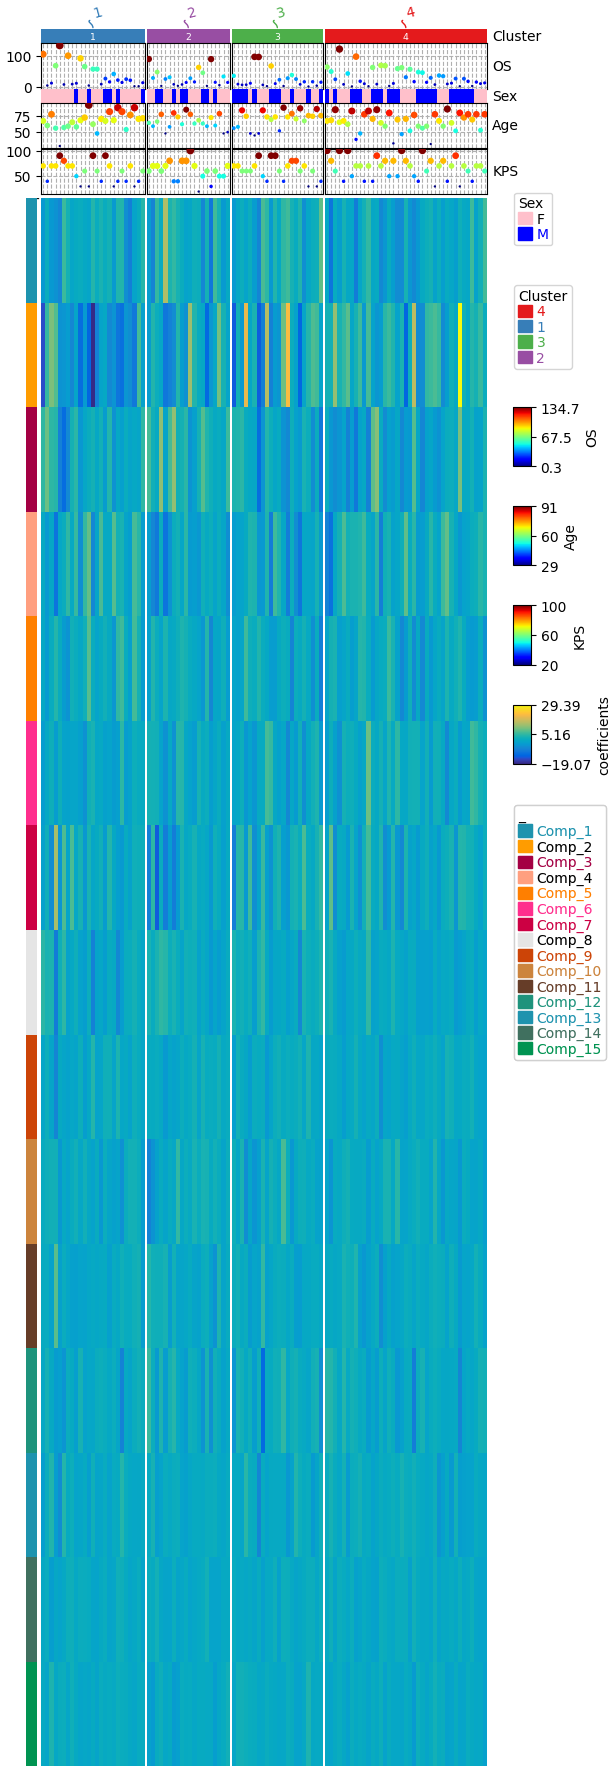

In [61]:
col_ha= HeatmapAnnotation(label=anno_label(df_cols.cluster_str,merge=True,rotation=15),
                          Cluster=anno_simple(df_cols.cluster_str,add_text=True, legend=['1','2','3','4']),
                        OS=anno_scatterplot(df_cols['OSM'],height=10),#, legend_kws={'rotation':90}),

                         # months=df_PCNSL.Overall_survival_months_interval,
                          Sex=anno_simple(df_cols.Sex,add_text=False,legend=True, colors={'F': 'pink', 'M': 'blue'}),

                        Age=anno_scatterplot(df_cols['Age'],height=10),
                        KPS=anno_scatterplot(df_cols['KPS'],height=10),

                          axis=1)

row_colors_dict={'PLS_components':{
                'Comp_1':'#1E93AE','Comp_2':'#FF9C00','Comp_3':'#A40043','Comp_4':'#FF9F7F',
                'Comp_5':'#FF7F00','Comp_6':'#FF2E8D','Comp_7':'#CC0043','Comp_8':'#E5E5E5',
                'Comp_9':'#CC4407','Comp_10':'#CC843D','Comp_11':'#663D28','Comp_12':'#1E937C',
                'Comp_13':'#1E93AE','Comp_14':'#40705F','Comp_15':'#009351'}}

row_ha = HeatmapAnnotation(_ =anno_simple(df_rows['PLS_components'],colors=row_colors_dict['PLS_components'],rasterized=False),
                           #,'horizontalalignment':'left'},
                           label=False,label_kws={'rotation':0,  'rotation_mode':'anchor',}, 
                           axis=0)
plt.figure(figsize=(6, 20))
cm = ClusterMapPlotter(data=df_plot,#.loc[df_rows.index.tolist(),df_cols.index.tolist()],
                       left_annotation=row_ha,
                    top_annotation=col_ha,
                     col_split=df_cols.cluster_str, col_split_order=['1','2','3','4'],
                       row_cluster=False,col_cluster=False,
                       label='coefficients', row_dendrogram=False,legend_gap=10,
                       row_split_gap=2,col_split_gap=0.5,

                       cmap='parula',rasterized=True,#show_colnames=True
                       legend_hpad=5,legend_vpad=5
                      )

#plt.savefig("values_patients_components_PLS.svg",bbox_inches='tight', format='svg', dpi=1200)
plt.show()

## Heatmap radiomics features/patients 

In [62]:
df_median = pd.read_csv('/media/user/Seagate_RNA/PCNSL_PSL/5_df_survie/with_zscore/df_median.csv')


In [65]:
wavelets = []
for i in list(df_median.columns) :
    if "wavelet" in i :
        wavelets.append(i)
df_plot = df_median.drop(columns=['Unnamed: 0', 'ID_patient', 'censor']+wavelets)
df_plot.columns

Index(['original_shape2D_Elongation_zscore',
       'original_shape2D_MajorAxisLength_zscore',
       'original_shape2D_MaximumDiameter_zscore',
       'original_shape2D_MeshSurface_zscore',
       'original_shape2D_MinorAxisLength_zscore',
       'original_shape2D_Perimeter_zscore',
       'original_shape2D_PerimeterSurfaceRatio_zscore',
       'original_shape2D_PixelSurface_zscore',
       'original_shape2D_Sphericity_zscore',
       'original_firstorder_10Percentile_zscore',
       ...
       'original_ngtdm_Busyness_zscore', 'original_ngtdm_Coarseness_zscore',
       'original_ngtdm_Complexity_zscore', 'original_ngtdm_Contrast_zscore',
       'original_ngtdm_Strength_zscore', 'IK', 'Age', 'Sex_int',
       'Cluster_consensus', 'Overall.Survival.Months'],
      dtype='object', length=107)

In [66]:
first_order = []
shape_2D = []
glcm = []
gldm = []
glszm = []
glrlm = []
ngtdm = []

first_order_wavelet = []
shape_2D_wavelet = []
glcm_wavelet = []
gldm_wavelet = []
glszm_wavelet = []
glrlm_wavelet = []
ngtdm_wavelet = []


clinical = []

for i in list(df_coef['Unnamed: 0']) :
    if "wavelet" not in i :
        if "firstorder" in i :
            first_order.append(i)
        elif "shape2D" in i :
            shape_2D.append(i)
        elif "glcm" in i :
            glcm.append(i)
        elif "gldm" in i :
            gldm.append(i)
        elif "glrlm" in i :
            glrlm.append(i)
        elif "glszm" in i :
            glszm.append(i)
        elif "ngtdm" in i :
            ngtdm.append(i)
        else : 
            clinical.append(i)
    else:
        if "firstorder" in i :
            first_order_wavelet.append(i)
        elif "shape2D" in i :
            shape_2D_wavelet.append(i)
        elif "glcm" in i :
            glcm_wavelet.append(i)
        elif "gldm" in i :
            gldm_wavelet.append(i)
        elif "glrlm" in i :
            glrlm_wavelet.append(i)
        elif "glszm" in i :
            glszm_wavelet.append(i)
        elif "ngtdm" in i :
            ngtdm_wavelet.append(i)
            
            
df_rows = df_plot.T
df_rows_radiomics = df_rows.drop(index=['IK','Age','Sex_int','Cluster_consensus','Overall.Survival.Months'])
df_rows_radiomics['Type of feature'] = 's'
#df_rows_clinical = df_rows.filter(index=['IK','Age','Sex_int','Cluster_consensus','Overall.Survival.Months'])
def groupe(x) :
    if 'wavelet' not in x.name :
        if x.name in first_order :
            df_rows_radiomics.at[x.name, 'Type of feature'] = 'first_order'
        elif x.name in shape_2D :
            df_rows_radiomics.at[x.name, 'Type of feature'] = 'shape_2D'
        elif x.name in glcm :
            df_rows_radiomics.at[x.name, 'Type of feature'] = 'glcm'
        elif x.name in gldm :
            df_rows_radiomics.at[x.name, 'Type of feature'] = 'gldm'
        elif x.name in glszm :
            df_rows_radiomics.at[x.name, 'Type of feature'] = 'glszm'
        elif x.name in glrlm :
            df_rows_radiomics.at[x.name, 'Type of feature'] = 'glrlm'
        else:
             df_rows_radiomics.at[x.name, 'Type of feature'] = 'ngtdm'
    else :
        if x.name in first_order :
            df_rows_radiomics.at[x.name, 'Type of feature'] = 'first_order_wavelet'
        elif x.name in shape_2D :
            df_rows_radiomics.at[x.name, 'Type of feature'] = 'shape_2D_wavelet'
        elif x.name in glcm :
            df_rows_radiomics.at[x.name, 'Type of feature'] = 'glcm_wavelet'
        elif x.name in gldm :
            df_rows_radiomics.at[x.name, 'Type of feature'] = 'gldm_wavelet'
        elif x.name in glszm :
            df_rows_radiomics.at[x.name, 'Type of feature'] = 'glszm_wavelet'
        elif x.name in glrlm :
            df_rows_radiomics.at[x.name, 'Type of feature'] = 'glrlm_wavelet'
        else:
             df_rows_radiomics.at[x.name, 'Type of feature'] = 'ngtdm_wavelet'
df_rows_radiomics.apply(groupe, axis=1)
df_rows_radiomics = df_rows_radiomics[['Type of feature']]
df_rows_radiomics.head()

,Type of feature
original_shape2D_Elongation_zscore,shape_2D
original_shape2D_MajorAxisLength_zscore,shape_2D
original_shape2D_MaximumDiameter_zscore,shape_2D
original_shape2D_MeshSurface_zscore,shape_2D
original_shape2D_MinorAxisLength_zscore,shape_2D


In [70]:
df_plot_test = df_plot[list(df_rows_radiomics.index)]
df_plot_test

,original_shape2D_Elongation_zscore,original_shape2D_MajorAxisLength_zscore,original_shape2D_MaximumDiameter_zscore,original_shape2D_MeshSurface_zscore,original_shape2D_MinorAxisLength_zscore,original_shape2D_Perimeter_zscore,original_shape2D_PerimeterSurfaceRatio_zscore,original_shape2D_PixelSurface_zscore,original_shape2D_Sphericity_zscore,original_firstorder_10Percentile_zscore,...,original_glszm_SmallAreaHighGrayLevelEmphasis_zscore,original_glszm_SmallAreaLowGrayLevelEmphasis_zscore,original_glszm_ZoneEntropy_zscore,original_glszm_ZonePercentage_zscore,original_glszm_ZoneVariance_zscore,original_ngtdm_Busyness_zscore,original_ngtdm_Coarseness_zscore,original_ngtdm_Complexity_zscore,original_ngtdm_Contrast_zscore,original_ngtdm_Strength_zscore
0,0.204689,-0.202608,-0.218290,-0.196173,-0.065520,-0.166566,-0.145580,-0.196173,0.294317,0.064855,...,-0.136321,-0.216410,0.101197,-0.189370,-0.306136,-0.155121,-0.194315,-0.174310,-0.176826,-0.223148
1,0.118476,-0.157835,-0.150956,-0.218053,-0.100885,-0.155685,-0.102624,-0.218053,0.280228,0.062644,...,-0.094784,-0.214167,0.046472,-0.160118,-0.299368,-0.218476,-0.195745,-0.149344,-0.204493,-0.219864
2,0.171366,-0.212083,-0.197687,-0.149808,-0.033161,-0.163365,-0.144223,-0.149808,0.260376,-0.095243,...,-0.091714,-0.246566,0.061659,-0.081498,-0.248695,-0.126090,-0.153060,-0.207923,-0.171403,-0.201662
3,0.168273,-0.211491,-0.194465,-0.144234,-0.028588,-0.147335,-0.161772,-0.144234,0.288474,0.022738,...,-0.099273,-0.224200,0.080574,-0.097775,-0.280586,-0.191339,-0.187904,-0.168749,-0.176780,-0.206707
4,0.088627,-0.023765,-0.019104,-0.058407,0.010541,0.002005,-0.233590,-0.058410,0.240854,0.122270,...,-0.130518,-0.228051,0.060549,-0.188616,-0.324642,-0.124161,-0.283835,-0.145189,-0.177446,-0.238230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.129475,-0.098598,-0.108919,-0.174351,-0.076349,-0.070578,-0.175292,-0.174351,0.254156,0.112710,...,-0.155601,-0.257959,0.102600,-0.192814,-0.334893,-0.071858,-0.220084,-0.248692,-0.209955,-0.245917
102,0.193368,-0.233699,-0.235876,-0.214169,-0.089772,-0.218494,-0.077935,-0.214169,0.287895,-0.068403,...,-0.103847,-0.329097,0.117045,-0.156442,-0.329008,-0.101411,-0.122808,-0.118186,-0.217174,-0.186073
103,0.114513,-0.084073,-0.076098,-0.137138,-0.054051,-0.083453,-0.210715,-0.137138,0.261994,0.021144,...,-0.101629,-0.352979,0.097570,-0.170447,-0.246940,-0.140395,-0.234000,-0.088577,-0.187591,-0.194619
104,0.124117,-0.247531,-0.270186,-0.254939,-0.128502,-0.226927,-0.038901,-0.254939,0.265700,-0.077758,...,-0.081616,-0.324015,0.104468,-0.121962,-0.325442,-0.225740,-0.103402,-0.223288,-0.176305,-0.186907


In [67]:
df_cols = df_plot[['IK','Age','Sex_int','Cluster_consensus','Overall.Survival.Months']]
df_cols.rename(columns={'Overall.Survival.Months':'OSM'}, inplace=True)
df_cols.reset_index(inplace=True)
if 'level_0' in list(df_cols.columns) :
    df_cols.drop(columns='level_0', inplace=True)
    
df_cols['cluster_str'] = df_cols['Cluster_consensus'].apply(str)
#df_PCNSL.index = ['sample' + str(i) for i in range(1, df_PCNSL.shape[0] + 1)]
df_cols['Gender'] = np.where(df_cols['Sex_int']==1, 'F', 'M')
df_cols.head()
df_cols

/tmp/ipykernel_10752/1027689681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cols.rename(columns={'Overall.Survival.Months':'OSM'}, inplace=True)
/tmp/ipykernel_10752/1027689681.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cols['cluster_str'] = df_cols['Cluster_consensus'].apply(str)
/tmp/ipykernel_10752/1027689681.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

,index,IK,Age,Sex_int,Cluster_consensus,OSM,cluster_str,Gender
0,0,60,64,1,2,90.4,2,F
1,1,100,67,0,4,64.2,4,M
2,2,80,68,1,4,49.4,4,F
3,3,70,59,1,2,28.3,2,F
4,4,70,67,1,1,106.2,1,F
...,...,...,...,...,...,...,...,...
101,101,60,71,0,1,12.7,1,M
102,102,70,77,1,4,14.8,4,F
103,103,40,75,0,3,14.3,3,M
104,104,70,53,1,4,9.7,4,F


Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations
Plotting legends..


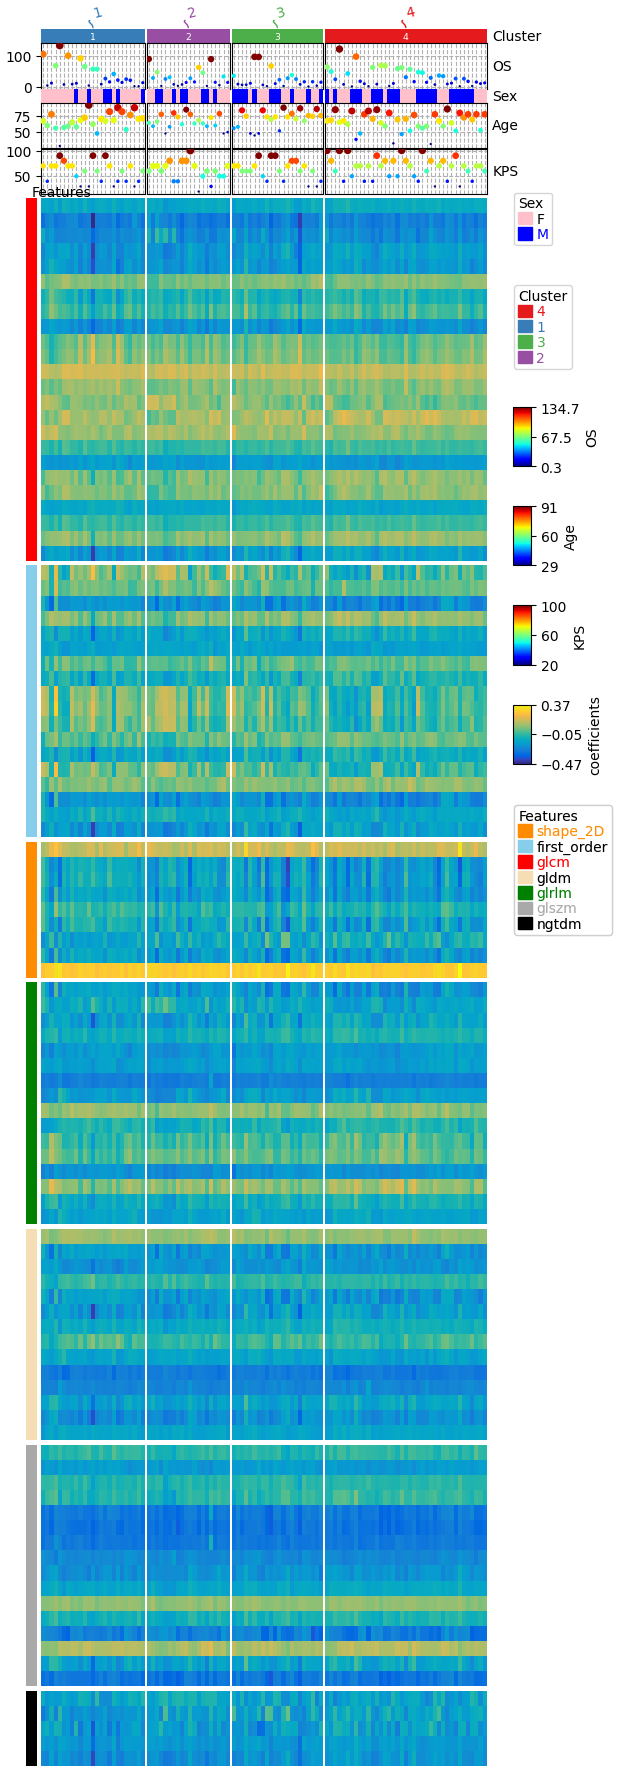

In [71]:
row_color_dict = {'Type of feature': {'shape_2D': 'darkorange',
  'first_order': 'skyblue',
  'glcm': 'red',
  'gldm': 'wheat',
  'glrlm': 'green',
  'glszm': 'darkgray', 'ngtdm' :'black' }}

col_ha= HeatmapAnnotation(label=anno_label(df_cols.cluster_str,merge=True,rotation=15),
                          Cluster=anno_simple(df_cols.cluster_str,add_text=True),
                        OS=anno_scatterplot(df_cols['OSM'],height=10),#, legend_kws={'rotation':90}),

                         # months=df_PCNSL.Overall_survival_months_interval,
                          Sex=anno_simple(df_cols.Gender,add_text=False,legend=True, colors={'F': 'pink', 'M': 'blue'}),

                        Age=anno_scatterplot(df_cols['Age'],height=10),
                        KPS=anno_scatterplot(df_cols['IK'],height=10),

                          axis=1)


row_ha = HeatmapAnnotation(Features =anno_simple(df_rows_radiomics['Type of feature'],colors=row_color_dict['Type of feature'],rasterized=False),
                           #,'horizontalalignment':'left'},
                           label=False,label_kws={'rotation':0,  'rotation_mode':'anchor',}, 
                           axis=0)
plt.figure(figsize=(6, 20))
cm = ClusterMapPlotter(data=df_plot_test.T,#.loc[df_rows.index.tolist(),df_cols.index.tolist()],
                        left_annotation=row_ha,
                    top_annotation=col_ha,
                     col_split=df_cols.cluster_str, col_split_order=['1','2','3','4'],
                       row_cluster=False,col_cluster=False,
                       label='coefficients', row_dendrogram=False,legend_gap=10,
                       row_split_gap=1,col_split_gap=0.5,
                    row_split=df_rows_radiomics['Type of feature'],
                       cmap='parula',rasterized=True,#show_colnames=True
                       legend_hpad=5,legend_vpad=5
                      )

plt.savefig("values_patients_radiomics_features.svg",bbox_inches='tight', format='svg', dpi=1200)
plt.show()

## Heatmap radiomics features/PLS Cox components 

In [72]:
df_coef = pd.read_csv('df_coef.csv')
df_coef.head()

,Unnamed: 0,Comp_1,Comp_2,Comp_3,Comp_4,Comp_5,Comp_6,Comp_7,Comp_8,Comp_9,Comp_10,Comp_11,Comp_12,Comp_13,Comp_14,Comp_15
0,original_shape2D_Elongation_zscore,0.150594,0.226738,0.027203,-0.028016,0.168480,-0.137348,-0.198881,-0.440063,-0.251066,-0.283581,0.239537,0.212475,0.357849,0.265914,0.294276
1,original_shape2D_MajorAxisLength_zscore,-0.032272,-0.111198,0.442528,0.051015,-0.330861,-0.229635,0.448110,-0.154594,-0.147586,-0.157940,-0.398328,-0.067966,0.460335,-0.818014,-0.519711
2,original_shape2D_MaximumDiameter_zscore,0.003284,-0.092148,0.426746,0.039048,-0.238053,-0.144456,0.432015,-0.140785,-0.012014,-0.036218,-0.232940,0.016469,0.833006,-0.175447,-0.346151
3,original_shape2D_MeshSurface_zscore,-0.137664,-0.058677,0.305688,0.103647,-0.068136,-0.118889,0.405941,-0.444545,-0.169049,-0.069742,0.779242,-1.050281,1.617311,-0.010958,-1.094296
4,original_shape2D_MinorAxisLength_zscore,-0.136262,0.029778,0.257643,0.123248,0.070031,-0.112337,0.235742,-0.169574,-0.014232,-0.119962,0.506224,-0.738325,0.068884,0.199276,0.270374


In [73]:
first_order = []
shape_2D = []
glcm = []
gldm = []
glszm = []
glrlm = []
ngtdm = []

first_order_wavelet = []
shape_2D_wavelet = []
glcm_wavelet = []
gldm_wavelet = []
glszm_wavelet = []
glrlm_wavelet = []
ngtdm_wavelet = []


clinical = []

for i in list(df_coef['Unnamed: 0']) :
    if "wavelet" not in i :
        if "firstorder" in i :
            first_order.append(i)
        elif "shape2D" in i :
            shape_2D.append(i)
        elif "glcm" in i :
            glcm.append(i)
        elif "gldm" in i :
            gldm.append(i)
        elif "glrlm" in i :
            glrlm.append(i)
        elif "glszm" in i :
            glszm.append(i)
        elif "ngtdm" in i :
            ngtdm.append(i)
        else : 
            clinical.append(i)
    else:
        if "firstorder" in i :
            first_order_wavelet.append(i)
        elif "shape2D" in i :
            shape_2D_wavelet.append(i)
        elif "glcm" in i :
            glcm_wavelet.append(i)
        elif "gldm" in i :
            gldm_wavelet.append(i)
        elif "glrlm" in i :
            glrlm_wavelet.append(i)
        elif "glszm" in i :
            glszm_wavelet.append(i)
        elif "ngtdm" in i :
            ngtdm_wavelet.append(i)

In [74]:
df_coef.set_index('Unnamed: 0', inplace=True)
#df_heatmap.drop(columns='index', inplace=True)
df_coef['Type of feature'] = 's'

def groupe(x) :
    if 'wavelet' not in x.name :
        if x.name in first_order :
            df_coef.at[x.name, 'Type of feature'] = 'first_order'
        elif x.name in shape_2D :
            df_coef.at[x.name, 'Type of feature'] = 'shape_2D'
        elif x.name in glcm :
            df_coef.at[x.name, 'Type of feature'] = 'glcm'
        elif x.name in gldm :
            df_coef.at[x.name, 'Type of feature'] = 'gldm'
        elif x.name in glszm :
            df_coef.at[x.name, 'Type of feature'] = 'glszm'
        elif x.name in glrlm :
            df_coef.at[x.name, 'Type of feature'] = 'glrlm'
        else:
             df_coef.at[x.name, 'Type of feature'] = 'ngtdm'
    else :
        if x.name in first_order :
            df_coef.at[x.name, 'Type of feature'] = 'first_order_wavelet'
        elif x.name in shape_2D :
            df_coef.at[x.name, 'Type of feature'] = 'shape_2D_wavelet'
        elif x.name in glcm :
            df_coef.at[x.name, 'Type of feature'] = 'glcm_wavelet'
        elif x.name in gldm :
            df_coef.at[x.name, 'Type of feature'] = 'gldm_wavelet'
        elif x.name in glszm :
            df_coef.at[x.name, 'Type of feature'] = 'glszm_wavelet'
        elif x.name in glrlm :
            df_coef.at[x.name, 'Type of feature'] = 'glrlm_wavelet'
        else:
             df_coef.at[x.name, 'Type of feature'] = 'ngtdm_wavelet'
df_coef.apply(groupe, axis=1)

Unnamed: 0
original_shape2D_Elongation_zscore         None
original_shape2D_MajorAxisLength_zscore    None
original_shape2D_MaximumDiameter_zscore    None
original_shape2D_MeshSurface_zscore        None
original_shape2D_MinorAxisLength_zscore    None
                                           ... 
wavelet.LL_ngtdm_Busyness_zscore           None
wavelet.LL_ngtdm_Coarseness_zscore         None
wavelet.LL_ngtdm_Complexity_zscore         None
wavelet.LL_ngtdm_Contrast_zscore           None
wavelet.LL_ngtdm_Strength_zscore           None
Length: 472, dtype: object

In [75]:
df_rows = df_coef.filter(['Type of feature'])
df_rows.head()

,Type of feature
Unnamed: 0,
original_shape2D_Elongation_zscore,shape_2D
original_shape2D_MajorAxisLength_zscore,shape_2D
original_shape2D_MaximumDiameter_zscore,shape_2D
original_shape2D_MeshSurface_zscore,shape_2D
original_shape2D_MinorAxisLength_zscore,shape_2D


In [76]:
df_cols = df_coef.T
df_cols.reset_index(inplace=True)
df_cols = df_cols[['index']]
df_cols.drop(index=15, inplace=True)
df_cols['PLS_components'] = df_cols['index']
df_cols.set_index('index', inplace=True)
df_cols.head()

Unnamed: 0,PLS_components
index,
Comp_1,Comp_1
Comp_2,Comp_2
Comp_3,Comp_3
Comp_4,Comp_4
Comp_5,Comp_5


In [77]:
df_coef.drop(columns='Type of feature', inplace=True)
df_coef.index.name = None
df_coef

,Comp_1,Comp_2,Comp_3,Comp_4,Comp_5,Comp_6,Comp_7,Comp_8,Comp_9,Comp_10,Comp_11,Comp_12,Comp_13,Comp_14,Comp_15
original_shape2D_Elongation_zscore,0.150594,0.226738,0.027203,-0.028016,0.168480,-0.137348,-0.198881,-0.440063,-0.251066,-0.283581,0.239537,0.212475,0.357849,0.265914,0.294276
original_shape2D_MajorAxisLength_zscore,-0.032272,-0.111198,0.442528,0.051015,-0.330861,-0.229635,0.448110,-0.154594,-0.147586,-0.157940,-0.398328,-0.067966,0.460335,-0.818014,-0.519711
original_shape2D_MaximumDiameter_zscore,0.003284,-0.092148,0.426746,0.039048,-0.238053,-0.144456,0.432015,-0.140785,-0.012014,-0.036218,-0.232940,0.016469,0.833006,-0.175447,-0.346151
original_shape2D_MeshSurface_zscore,-0.137664,-0.058677,0.305688,0.103647,-0.068136,-0.118889,0.405941,-0.444545,-0.169049,-0.069742,0.779242,-1.050281,1.617311,-0.010958,-1.094296
original_shape2D_MinorAxisLength_zscore,-0.136262,0.029778,0.257643,0.123248,0.070031,-0.112337,0.235742,-0.169574,-0.014232,-0.119962,0.506224,-0.738325,0.068884,0.199276,0.270374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wavelet.LL_ngtdm_Busyness_zscore,-0.066695,0.000898,-0.012254,0.005252,0.055012,0.048366,0.195345,0.145765,0.060799,-0.032673,-0.036967,0.080102,-0.015203,-0.039376,0.135042
wavelet.LL_ngtdm_Coarseness_zscore,0.054385,0.103171,-0.466575,0.014826,0.133346,0.360199,-0.396483,0.092679,-0.041101,0.260136,-0.166152,0.080485,-0.362640,1.033500,0.578975
wavelet.LL_ngtdm_Complexity_zscore,0.107482,0.221375,-0.581485,0.078449,-0.475302,-0.590894,0.392118,-0.202378,-0.063377,0.133315,0.961480,0.359550,-0.666546,-0.580104,0.499773
wavelet.LL_ngtdm_Contrast_zscore,-0.005778,0.208894,-0.060523,0.228341,0.132930,-0.230318,-0.046681,0.711615,-0.597341,-0.447281,0.636512,0.027762,0.415639,-0.327638,-0.006930


In [80]:
df_rows=df_rows[:102]
df_coef=df_coef[:102]

In [78]:
row_color_dict = {'Type of feature': {'shape_2D': 'darkorange',
  'first_order': 'skyblue',
  'glcm': 'red',
  'gldm': 'wheat',
  'glrlm': 'green',
  'glszm': 'darkgray', 'ngtdm' :'black' }}

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..


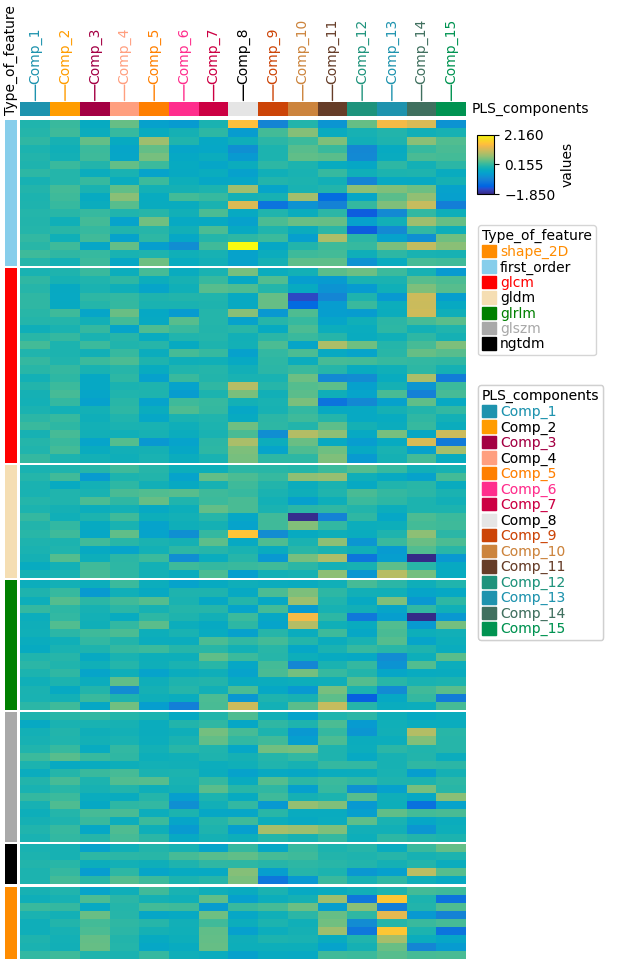

In [81]:
col_colors_dict={
                'Comp_1':'#1E93AE','Comp_2':'#FF9C00','Comp_3':'#A40043','Comp_4':'#FF9F7F',
                'Comp_5':'#FF7F00','Comp_6':'#FF2E8D','Comp_7':'#CC0043','Comp_8':'#E5E5E5',
                'Comp_9':'#CC4407','Comp_10':'#CC843D','Comp_11':'#663D28','Comp_12':'#1E937C',
                'Comp_13':'#1E93AE','Comp_14':'#40705F','Comp_15':'#009351'
#     ,'Gallbladder':'#E7E4BF',
#                 'Gastric-Ep':'#CCA300','Head-Neck-Ep':'#002929','Heart-Cardio':'#FF99AA','Heart-Fibro':'#FF99FF',
#                 'Kidney-Ep':'#F6FF99','Liver-Hep':'#6CBF00','Lung-Ep-Alveo':'#BA99FF','Lung-Ep-Bron':'#CCCCFF',
#                 'Neuron':'#9e542e','Oligodend':'#2ca02c','Pancreas-Acinar':'#DF7F00','Pancreas-Beta':'#FFD866',
#                 'Pancreas-Delta':'#FFCC32','Pancreas-Duct':'#7F4C33','Skeletal-Musc':'#FFCCEE','Small-Int-Ep':'#CC9951',
#                 'Smooth-Musc':'#1E93AE','Thyroid-Ep':'#B2BFFF'
}

col_ha = HeatmapAnnotation(label=anno_label(df_cols['PLS_components'],merge=True,rotation=90,extend=True,
                                            colors=col_colors_dict,adjust_color=True,luminance=0.75,
                                            relpos=(0.5,0)), #fontsize=10
                           PLS_components=anno_simple(df_cols['PLS_components'],colors=col_colors_dict, label=False), #legend_kws={'fontsize':4}
                           verbose=0,axis=1)

row_ha = HeatmapAnnotation(Type_of_feature=anno_simple(df_rows['Type of feature'],colors=row_color_dict['Type of feature'],rasterized=True),
                           label=False, axis=0)
                           
                
#data was sorted to have the same Group order for rows and columns
df_rows.sort_values('Type of feature',inplace=True)
#df_cols.sort_values('groupe',inplace=True)
plt.figure(figsize=(6, 10))
cm = ClusterMapPlotter(data=df_coef,#.loc[df_rows.index.tolist(),df_cols.index.tolist()],
                       top_annotation=col_ha,
                       left_annotation=row_ha,
                       row_cluster=False,col_cluster=False,
                       label='values', 
                       row_dendrogram=False,legend_gap=7,
                       row_split=df_rows['Type of feature'],
                     #  col_split=df_cols.groupe,
                       row_split_gap=0.5,col_split_gap=0.1,
                       row_split_order=df_rows['Type of feature'].unique().tolist(),
                     # col_split_order=df_rows.groupe.unique().tolist(),
                       cmap='parula',rasterized=True
                      )
plt.savefig("coef_components_radiomics_features.svg",bbox_inches='tight', format='svg', dpi=1200)
plt.show()

# UPSET PLOTS

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from datetime import datetime

In [83]:
PATH = "/media/user/Seagate_RNA/PCNSL_PSL/1_patches_filiot_224/"
PATH_json = '/media/user/Seagate_RNA/PCNSL_PSL/3_hovernet_normalisation_reinhard_224/'
PATH_histo = "/media/user/Seagate_RNA/PCNSL_PSL/4_pyradiomics_patches/"
#PATH_output_mask_nuclei = "/media/user/Ligue_RNA_2partie/PCNSL_2022/masks_nuclei_pyradiomics/"
PATH_output_mask_nuclei = "/media/user/Seagate_RNA/PCNSL_PSL/4_masks_nuclei_pyradiomics//"

PATH_df_pyradiomics = "/media/user/Seagate_RNA/PCNSL_PSL/4_df_pyradiomics/"
PATH_df_count_cells = '/media/user/Seagate_RNA/PCNSL_PSL/4_df_count_cells/'

PATH_output = '/media/user/Seagate_RNA/PCNSL_PSL/4_df_count_cells/'

In [84]:
%%capture
%load_ext rpy2.ipython

In [85]:
%%R
library(ggplot2)
library(ComplexUpset)

In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages


In [86]:
df_meta = pd.read_csv('/media/user/Seagate_RNA/PCNSL_PSL/metadata_106.csv', sep=',')

In [87]:
df_meta['cluster_int'] = df_meta['Cluster_consensus'].astype(int)

In [88]:
df_meta[['IK', 'Age', 'Cluster_consensus']].to_csv('/media/user/Seagate_RNA/PCNSL_PSL/df_meta_ik_age_cluster.csv')
df_meta_ikage = df_meta[['IK', 'Age', 'Cluster_consensus', 'Sex']]
df_meta_ikage.rename(columns={'IK':'KPS'}, inplace=True)

/tmp/ipykernel_10752/3973411784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meta_ikage.rename(columns={'IK':'KPS'}, inplace=True)


In [89]:
df_meta_ikage.reset_index(inplace=True)
df_meta_ikage['Sex_true'] = np.where(df_meta_ikage['Sex']=='F', 'F', 'M')
df_meta_ikage.drop(columns='Sex', inplace=True)
df_meta_ikage.rename(columns={'Sex_true':'Gender'}, inplace=True)
df_meta_ikage.head()

/tmp/ipykernel_10752/2288878862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meta_ikage['Sex_true'] = np.where(df_meta_ikage['Sex']=='F', 'F', 'M')
/tmp/ipykernel_10752/2288878862.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meta_ikage.drop(columns='Sex', inplace=True)
/tmp/ipykernel_10752/2288878862.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meta_

,index,KPS,Age,Cluster_consensus,Gender
0,0,60,64,2,F
1,1,100,67,4,M
2,2,80,68,4,F
3,3,70,59,2,F
4,4,70,67,1,F


In [91]:
dummies = pd.get_dummies(df_meta_ikage['Cluster_consensus'])
dummies.reset_index(inplace=True)
dummies.head()
test = pd.merge(df_meta_ikage,dummies, on='index')
test.drop(columns=['Cluster_consensus', 'index'], inplace=True)
test2 = test.drop(columns=['KPS', 'Age', 'Gender'])
test2.head()

,1,2,3,4
0,0,1,0,0
1,0,0,0,1
2,0,0,0,1
3,0,1,0,0
4,1,0,0,0


In [96]:
test3 = pd.merge(test2.reset_index(), test[['KPS', 'Age', 'Gender']].reset_index(), on='index', how='left')
test3.drop(columns='index', inplace=True)
cluster = list(test2.columns)


In [100]:
cluster

[1, 2, 3, 4]

In [97]:
%R -i test -i cluster -i test2 -i test3

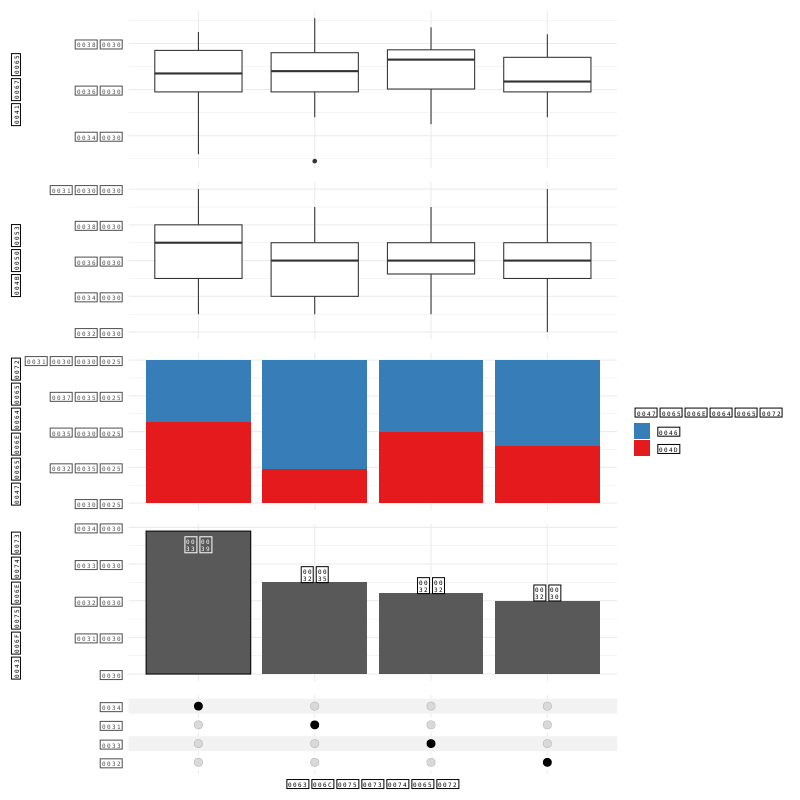

In [98]:
%%R -w 800 -h 800

set.seed(0)   # keep the same jitter for identical plots
# Opening the graphical device
upset(
    test3,
    cluster,
    name='cluster',
    base_annotations=list(
        'Counts '=intersection_size()
        )
    ,
    set_sizes=FALSE,
    annotations = list(
'Age'=upset_annotate('Age', geom_boxplot(na.rm=TRUE)),
  'KPS'=upset_annotate('KPS', geom_boxplot(na.rm=TRUE))
        
                ,'Gender'=(
            ggplot(mapping=aes(fill=Gender))
            + geom_bar(stat='count', position='fill')
            + scale_y_continuous(labels=scales::percent_format())
            + scale_fill_manual(values=c(
                'M'='#E41A1C', 'F'='#377EB8'
            ))
            + ylab('Gender')
        )  
        
    
        
    ),
    min_size=10,
    width_ratio=0.1
)


